In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import itertools
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

## Part One: Why you shouldn't choose a used car just on its mileage

The best equation I can find (three degrees) only has a score of 0.0487 for its test data.

In [3]:
X = df[['Mileage']]
y = df[['Price']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=911)

/Users/gregiskhan/Documents/tiy/homework_week_5/car-worth-linear-regression/.direnv/python-3.5.1/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


R**2 score: 0.02046344732348948


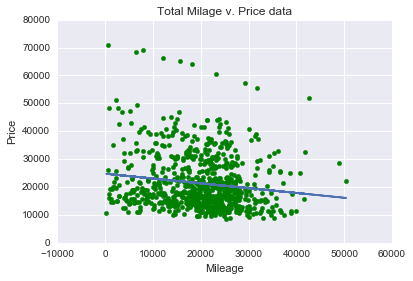

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
plt.scatter(X, y, color='green')
plt.plot(X, lin_reg.predict(X))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Total Milage v. Price data')
print('R**2 score: {}'.format(lin_reg.score(X,y)))
plt.show()

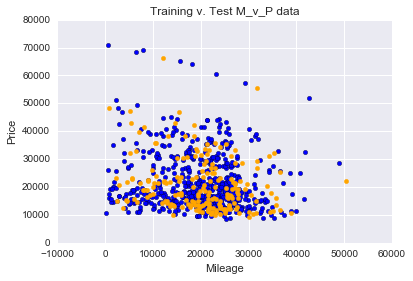

In [5]:
plt.scatter(train_X, train_y)
plt.scatter(test_X, test_y, color='orange')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Training v. Test M_v_P data')
plt.show()

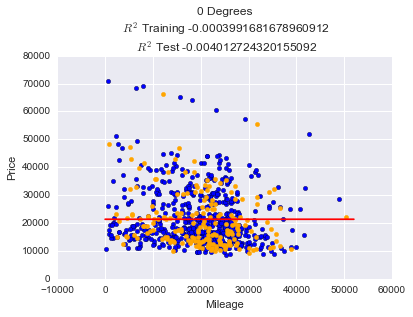

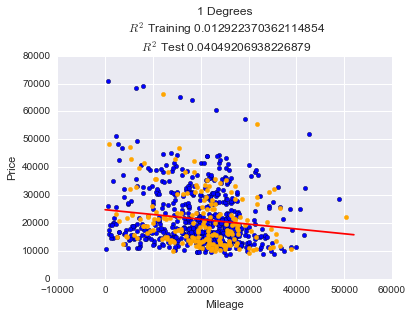

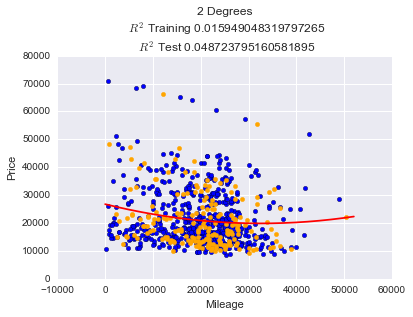

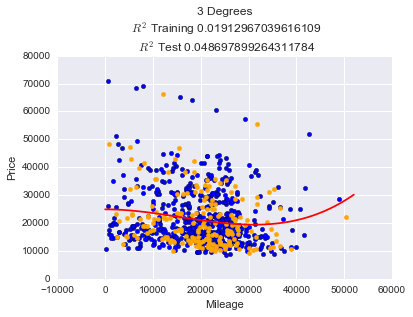

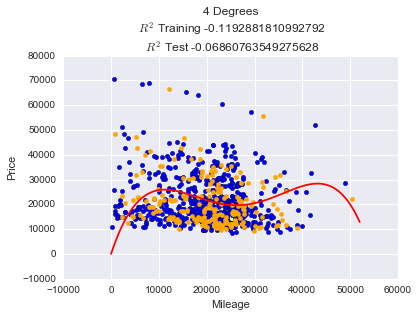

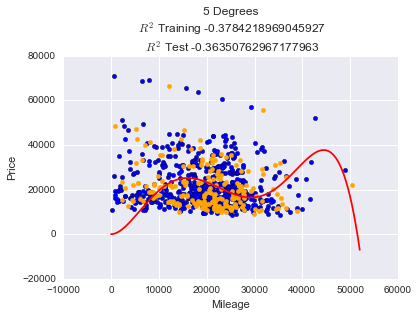

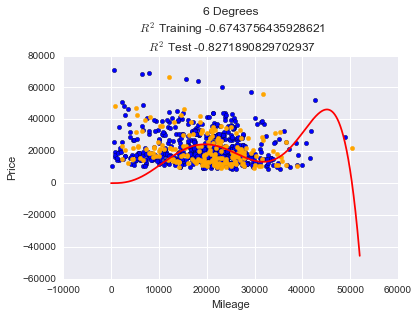

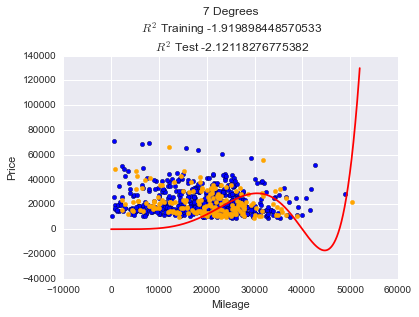

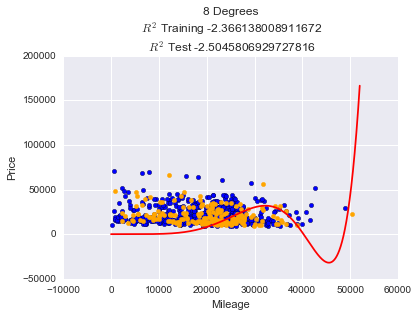

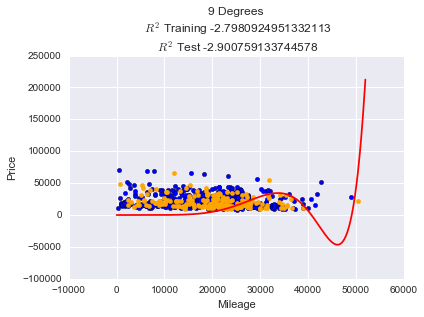

In [6]:
degrees = 10
for degree in range(degrees):
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression(fit_intercept=False))])

   
    model = model.fit(X, y)

    plt.plot(model.predict([[j] for j in range(52000)]), color='r')
    plt.scatter(train_X, train_y)
    plt.scatter(test_X, test_y, color='orange')
    plt.xlabel('Mileage')
    plt.ylabel('Price')
    plt.title('{} Degrees\n $R^2$ Training {}\n $R^2$ Test {}'.format(degree, model.score(train_X, train_y), model.score(test_X, test_y)))
    plt.show()

## Part Two:
1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

First, find the $R^{2}$ score for all seven columns for all the data.

In [7]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
X = df[columns]
y = df[['Price']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=911)
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print('mileage, cylinders, liters, doors, cruise, sound, and leather R**2 score: {}'.format(lin_reg.score(X,y)))


mileage, cylinders, liters, doors, cruise, sound, and leather R**2 score: 0.4462643536728379


Next, we need a function to iterate through all the combinations of a given size to find the best combination as shown by its $R^{2}$ score.

This function was first written by [github user katjackson](https://github.com/katjackson). I have modified it slightly to fit my notebook.

In [8]:
def get_best_combination_of_size(columns, size):
    groups = list(itertools.combinations(columns, size))

    best_r2 = 0
    best_combination = ''

    for group in groups:
        X = df[[a for a in group]]
        y = df['Price']
        train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=911)

        regr = LinearRegression()
        regr.fit(train_X, train_y)
        r2 = regr.score(test_X, test_y)

        if regr.score(X, y) > best_r2:
            best_r2 = r2
            best_combination = group

    return best_combination, best_r2


Now write a parent function to iterate over the number of members of the list of columns

In [9]:
def get_best_combination(columns):
    best_r2s = []
    best_combinations = []
    for number in range(1,len(columns) + 1):
        combo, score = get_best_combination_of_size(columns, number)
        best_r2s.append(score)
        best_combinations.append(combo)
    return best_combinations, best_r2s

In [10]:
best_combo, best_score = get_best_combination(columns)
combinations = pd.DataFrame({'Combination': best_combo, 'Score': best_score}, index=pd.Index(range(1,8), name='# Dependent Variables'))
print(combinations)
print('Best Combination: {}\nBest R**2: {}'.format(combinations.loc[7, 'Combination'], combinations.loc[7, 'Score']))

                                                             Combination  \
# Dependent Variables                                                      
1                                                            (Cylinder,)   
2                                                        (Liter, Cruise)   
3                                               (Liter, Cruise, Leather)   
4                                     (Mileage, Cylinder, Doors, Cruise)   
5                            (Mileage, Cylinder, Doors, Cruise, Leather)   
6                      (Mileage, Cylinder, Liter, Doors, Cruise, Leat...   
7                      (Mileage, Cylinder, Liter, Doors, Cruise, Soun...   

                          Score  
# Dependent Variables            
1                      0.316091  
2                      0.339494  
3                      0.358220  
4                      0.428445  
5                      0.443695  
6                      0.445587  
7                      0.454797  
Best Comb

More training data (in the form of more columns) seems to always be better

## Part Three:
1. Dummy up make, model, and body type.
2. Find the best combination of factors to predict price.

We'll read in the data to a new DataFrame and then call pd.get_dummies to numerize our "of type" data.

In [11]:
df = pd.read_csv("car_data.csv")
dummies = pd.get_dummies(df[['Make', 'Model', 'Trim', 'Type']].copy())

In [12]:
dummies = pd.get_dummies(df[['Make', 'Model', 'Trim', 'Type']].copy())

### Getting the data ready for linear regression

Drop the non-numeric columns and join the dummied columns.

In [13]:
df.drop(['Make', 'Model', 'Trim', 'Type'], axis=1, inplace=True)
df = df.join(dummies)

### Run our loop and functions again (See Part Two)
This will take longer to run on account of many more columns, but the basics are the same.

In [14]:
part_three_columns = df.columns.values.tolist()
part_three_columns.remove('Price')
best_combo, best_score = get_best_combination(part_three_columns)
combinations = pd.DataFrame({'Combination': best_combo, 'Score': best_score}, index=pd.Index(range(1,len(part_three_columns) + 1), name='# Dependent Variables'))
print('Best Combination: {}\nBest R**2: {}'.format(combinations.loc[7, 'Combination'], combinations.loc[7, 'Score']))

KeyboardInterrupt: 

['Price',
 'Mileage',
 'Cylinder',
 'Liter',
 'Doors',
 'Cruise',
 'Sound',
 'Leather',
 'Make_Buick',
 'Make_Cadillac',
 'Make_Chevrolet',
 'Make_Pontiac',
 'Make_SAAB',
 'Make_Saturn',
 'Model_9-2X AWD',
 'Model_9_3',
 'Model_9_3 HO',
 'Model_9_5',
 'Model_9_5 HO',
 'Model_AVEO',
 'Model_Bonneville',
 'Model_CST-V',
 'Model_CTS',
 'Model_Cavalier',
 'Model_Century',
 'Model_Classic',
 'Model_Cobalt',
 'Model_Corvette',
 'Model_Deville',
 'Model_G6',
 'Model_GTO',
 'Model_Grand Am',
 'Model_Grand Prix',
 'Model_Impala',
 'Model_Ion',
 'Model_L Series',
 'Model_Lacrosse',
 'Model_Lesabre',
 'Model_Malibu',
 'Model_Monte Carlo',
 'Model_Park Avenue',
 'Model_STS-V6',
 'Model_STS-V8',
 'Model_Sunfire',
 'Model_Vibe',
 'Model_XLR-V8',
 'Trim_AWD Sportwagon 4D',
 'Trim_Aero Conv 2D',
 'Trim_Aero Sedan 4D',
 'Trim_Aero Wagon 4D',
 'Trim_Arc Conv 2D',
 'Trim_Arc Sedan 4D',
 'Trim_Arc Wagon 4D',
 'Trim_CX Sedan 4D',
 'Trim_CXL Sedan 4D',
 'Trim_CXS Sedan 4D',
 'Trim_Conv 2D',
 'Trim_Coupe 2D'